You can run this in HCC but, it is more easy to run as a `.py` file. Just copy all the cells to a `.py` file and run it using `sbatch`

In [9]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)

# change this to true when running on HCC
HCC = False
path_to_data = "data/"

In [ ]:


# Define the path to the data file
data_file = os.path.join(path_to_data, 'US_Fleet_County_2021Q4.parquet')

if HCC:
    df = pd.read_parquet(data_file)
else:
    import dask.dataframe as dd
    data = dd.read_parquet(data_file).repartition(npartitions=100)
    df = data.partitions[0].compute()


: 

In [5]:
import pandas as pd
df = pd.read_csv("/workspaces/ev-chicken-egg/data/part_1_100.csv")


In [6]:
cols_value_cat = {
    "Vehicle Segmentation": {
        "Car": ['Sport Car - Subcompact Luxury',
                'Sport Car - Subcompact Exotic',
                'Sport Car - Subcompact',
                'Sport Car - Midsize',
                'Sport Car - Large Exotic',
                'Sport Car - Large',
                'Sport Car - Compact',
                'Car - Compact',
                'Car - Compact Exotic',
                'Car - Compact Luxury',
                'Car - Large',
                'Car - Large Exotic',
                'Car - Large Luxury',
                'Car - Micro',
                'Car - Midsize',
                'Car - Midsize Exotic',
                'Car - Midsize Luxury',
                'Car - Subcompact',
                'Car - Subcompact Luxury',
                'Sport Car - Compact Exotic',
                'Sport Car - Compact Luxury',
                'Sport Car - Large Luxury',
                'Sport Car - Midsize Exotic',
                'Sport Car - Midsize Luxury',
                ],
        "CUV": ['CUV - Compact',
                'CUV - Compact Exotic',
                'CUV - Compact Luxury',
                'CUV - Large',
                'CUV - Large Exotic',
                'CUV - Large Luxury',
                'CUV - Midsize',
                'CUV - Midsize Luxury',
                'CUV - Subcompact',
                'CUV - Subcompact Exotic',],
        "SUV": ['SUV - Compact',
                'SUV - Compact Luxury',
                'SUV - Large',
                'SUV - Large Luxury',
                'SUV - Midsize',
                'SUV - Midsize Exotic',
                'SUV - Midsize Luxury',
                'SUV - Subcompact'],
        "Truck": [],
        "Pickup": ['Pickup - Compact',
                   'Pickup - Fullsize',
                   'Pickup - Fullsize Luxury',
                   'Pickup - Midsize'],
        "Van": [
            'Van - Full Sized',
            'Van - Fullsize',
            'Van - Fullsize Luxury',
            'Van - Mini',
            'Van - Mini Luxury',
        ],
        "Other": ['Other',]

    },

    "Vehicle Fuel Type": {
        "ICE": ['Biodiesel', 'CNG',
                'CNG~Flex~Gasoline',
                'CNG~Gasoline',
                'CNG~LPG~Gasoline',
                'Diesel',
                'Diesel~Gasoline',
                'E85~Flex~Gasoline',
                'Ethanol',
                'Flex',
                'Flex Fuel',
                'Flex Fuel~Gasoline',
                'Flex~Gasoline',
                'Flex~Gasoline/E85/CNG/LPG',
                'GFP',
                'Gas/Electric Hybrid',
                'Gasoline',
                'Gasoline Hybrid',
                'Gasoline Hybrid~Gasoline',
                'Gasoline/LPG',
                'Gasoline~Natural Gas',
                'LPG',
                'LPG~Gasoline',
                'Methanol',
                'Natural Gas',
                'Natural Gas/Propane', 'Propane',],
        "BEV": ['Electric',],
        "PHEV": ['Hydrogen Fuel Cell', 'Plug-In Hybrid', 'Plug-in Gas/Electric Hybrid',],
        "HEV": ['Electric with Gas Generator',
                'Electric~Gasoline Hybrid',],
        "nan": ['nan'] 

    }
}

### I did this just to make easier creating this dictionary because there are so many types of fuel.
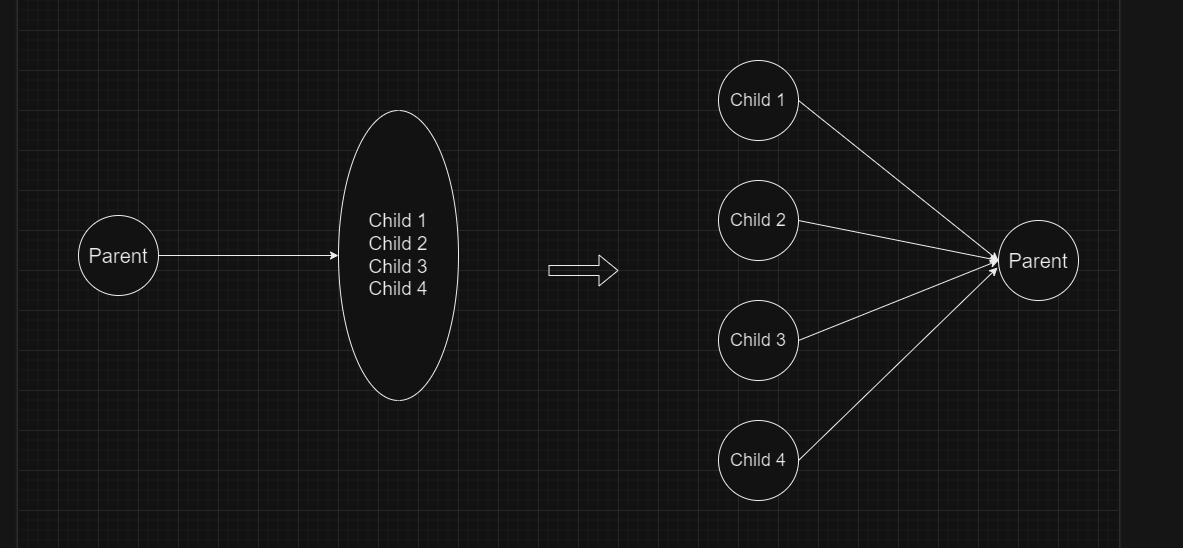

In [7]:
reversed_mapping_fuel_type = {value: key for key, values in cols_value_cat['Vehicle Fuel Type'].items() for value in values}

##### I have only mapped one of the column to general gategories, if needed add it to `cols_value_cat` -> create reverse_mapping-> and map it to the column needed

In [20]:
dfx = df[['County Code', 'State Code', "Vehicle Category", 'Vehicle Fuel Type', 'Vehicle Count']].copy()
dfx['Vehicle Fuel Type'] = dfx['Vehicle Fuel Type'].map(reversed_mapping_fuel_type)

In [22]:
dfx.groupby(['County Code', 'State Code', "Vehicle Category", 'Vehicle Fuel Type']).sum("Vehicle Count").reset_index()

,County Code,State Code,Vehicle Category,Vehicle Fuel Type,Vehicle Count
0,117,1,Passenger Car,ICE,515
1,119,1,Light Truck,ICE,555
2,119,1,Passenger Car,ICE,450
3,121,1,Light Truck,ICE,3900
4,121,1,Passenger Car,BEV,1
5,121,1,Passenger Car,ICE,1977
6,121,1,Passenger Car,PHEV,2
7,123,1,Light Truck,ICE,2567
8,123,1,Passenger Car,BEV,1
9,123,1,Passenger Car,ICE,981
